
# Project: Investigating No show Medical appointments in Brasil. (Data collected: May 2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project I will be analysing based on the given data how specific factors correlates for showing or not showing up at a medical appointment in Brasil in the given timeframe and parameters.
The datas are containing informations from different angles; like time related factors, location, gender, age, scholarship. And also specific basic categories of sicknesses, like hypertonia, diabetes. Also the contact type like sms received yes and no are displayed in the dataset. 


### Questions for Analysis
Altough the analysis can be provided from many different angle, I am going to focus on correlation between Age and Gender for showing or not showing up for a medical appointment. 

Question 1.) *How does the Age correlates for showing up at the medical appointment?*

Question 2.) *How does the Gender correlates for showing up at the medical appointment?*

Also I will be performing some really basic visualisations for distribution of some parameters like Age, Diabetes, Handcap (probably Handycap), Alcoholism, no show, Scholarship, SMS-received. 


In [1]:
# importing necessary moduls
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Loading data and printing out a few lines.
df = pd.read_csv('noshowapp.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#inspecting the basic statistic of the data; checking for values which will indicate cleaning.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#I checked here the unique values. 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Interpretation of unique values:
AppointmentID, ScheduleDay indicates here is surely data wrangling and cleaning needed. 
(As stated above Iam not going to analyse this parameters)
Scholarship, Hipertension, Diabetes, Alcoholism, SMS-received, No-show columns have only 2 values. 
My analyis focus areas Age has 104 values, Gender 2 values and No-show 2 values.

In [6]:
#altough it can be discussed the reason why is -1 in the Age column, like for example in case of pregnancy an unborn child is counted. My assumption is that this data could be a typo, or some error by gathering the original .csv file, 
# therefore I won't use it, so needs to be cleaned away.
#replacing all Age values which is 0 or -1:
df[df['Age']<=0] = df['Age'].mean()


In [7]:
#cross checking that for Age only values starting 1 are present:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.425642e+14,5.493660e+06,38.276780,1.285691,1.385142,1.259761,1.218296,1.210135,1.500806
std,2.530289e+14,1.001764e+06,22.104561,6.519426,6.506669,6.522499,6.527195,6.528421,6.489885
min,3.708887e+01,3.708887e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.251883e+12,5.636216e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.697449e+13,5.678212e+06,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.231455e+13,5.723640e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874


In [8]:
#checking duplicates:
print(df.duplicated().sum())

3539


In [9]:
#droping duplicates
df.drop_duplicates(inplace=True)

In [10]:
#cross checking that all duplicates are droped
print(df.duplicated().sum())

0


## Brief interpretation of datas:
AppointmentID, ScheduleDay indicates here is surely data wrangling and cleaning needed. 
(As stated above I am not going to analyse this parameters)

As during the data checking for duplicates was clear there been some duplicates, I droped them.

The decription of the datas shows at first sight that the majority of people are between 37 and 55 years old.


In [11]:
# this query checks how much columns (1st value in result) and how much rows (2nd value in result) are present
df.shape

(106988, 14)

In [12]:
#checking the datatypes
df.dtypes

PatientId         float64
AppointmentID     float64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age               float64
Neighbourhood      object
Scholarship       float64
Hipertension      float64
Diabetes          float64
Alcoholism        float64
Handcap           float64
SMS_received      float64
No-show            object
dtype: object

### Data Cleaning

In [13]:
# For my analysis focus which might differ from others I am going to drop PatientId, AppointmentID, and ScheduleDay as I won't look into this datas.
df.drop(['PatientId','AppointmentID','ScheduledDay'], axis = 1, inplace = True)
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,M,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,F,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,F,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,F,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [14]:
#for easier handling I renamed the columns to lowercase letters
df.columns= df.columns.str.lower()
df.head()

,gender,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,M,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,F,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,F,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,F,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [15]:
#I renamed this column so that the name structure is consistent:
df.rename(columns={'no-show':'no_show'}, inplace=True)
df.head()

,gender,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,M,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,F,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,F,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,F,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [16]:
#Checking the data types:
df.dtypes

gender             object
appointmentday     object
age               float64
neighbourhood      object
scholarship       float64
hipertension      float64
diabetes          float64
alcoholism        float64
handcap           float64
sms_received      float64
no_show            object
dtype: object

/Users/VVVVVVVVVopt/miniconda3/envs/python36-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users//opt/miniconda3/envs/python36-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/VVVVVVVVVopt/miniconda3/envs/python36-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layou

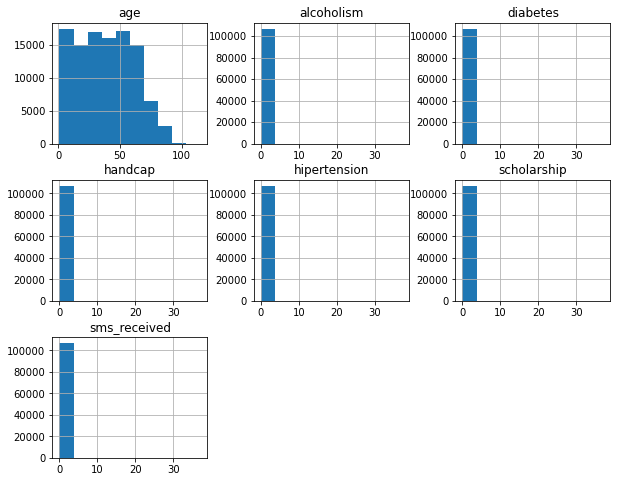

In [17]:
# run this query to visualize the basics above the dataset
df.hist(figsize=(10, 8));

### Interpretation of the Histograms above:


We have some *Quantitave* and also some *Categorical* datas, my examples hereby will focus on my analyis areas;
*Categorical Datas* are example: *Age*.
*Quantitative Datas* are example: *Gender* and *No-show*.

### Research Question: how does the Age of the patients refers to show up in the appointment?

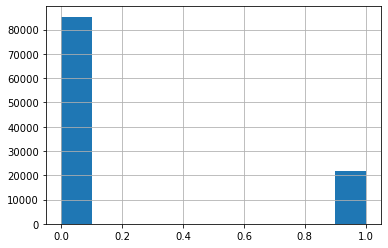

In [18]:
#for later analyis usage I am going to map the no show yes and no to numeric values, I will also check the ratio of show or not show for appointments.
df['no_show'] = df['no_show'].map({'Yes':1, 'No':0})
df.no_show.hist();

In [19]:
# coding for No-Show table Yes and No values, assigning integers to this values for the analysis:

notshown = df.no_show == 1
shown = df.no_show == 0
df.no_show.value_counts()


0.0    85307
1.0    21680
Name: no_show, dtype: int64

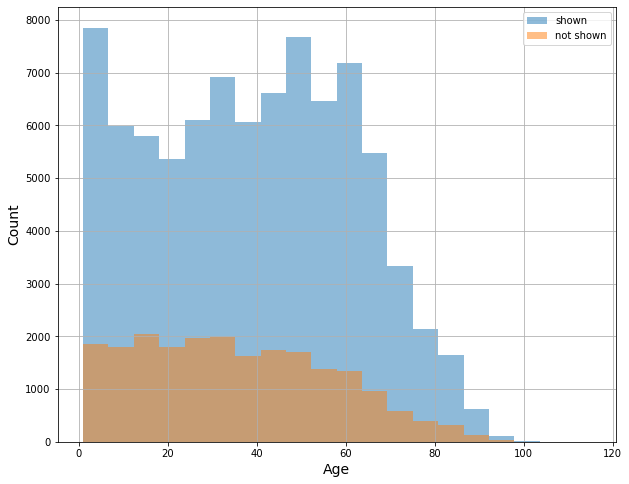

In [20]:
# visalisation for correlation between Age and showing up or not showing up for appointments:
df.age[shown].hist(figsize=(10,8), alpha=0.5, bins=20, label='shown')
df.age[notshown].hist(figsize=(10,8), alpha=0.5, bins=20, label='not shown')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend();

In [21]:
# I was curious about the mean age of shown up patients:
df.age[shown].mean()


39.07518726482

In [22]:
# I was curious about the mean age of not shown up patients:
df.age[notshown].mean()

35.329151291512915

### Analysis of correlation Age and show up for the Appointment

The *Age* does not seem to give a very clear correlation to show or not show up for the appointment. Therefore I will analyse the correlation for Gender and show op rate in the next section.

### Research Question 2 : How does the Gender correlates for showing up for a medical Appointment? 

In [23]:
notshown = df.no_show == 1
shown = df.no_show == 0
df.no_show.value_counts()

0.0    85307
1.0    21680
Name: no_show, dtype: int64

In [24]:
df.groupby('no_show')['gender'].value_counts()

no_show  gender
0.0      F         55843
         M         29464
1.0      F         14275
         M          7405
Name: gender, dtype: int64

In [25]:
df['gender'] = df['gender'].astype(str)

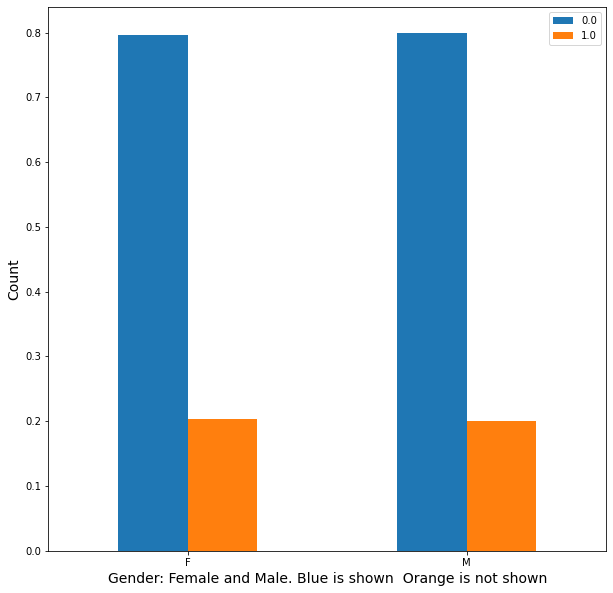

In [26]:
df.groupby('gender')['no_show'].value_counts(normalize=True).unstack('no_show').plot.bar(rot = 0, figsize=(10, 10))
plt.xlabel('Gender: Female and Male. Blue is shown  Orange is not shown', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend();

### Analysis of correlation Gender and show up for the Appointment

The *Gender* does not seem to give a very clear correlation to show or not show up for the appointment. 

<a id='conclusions'></a>
## Conclusions

Analysing correlation between *Gender and show up rate*: looking at the last diagram above it shows that considering Gender, both Females and Males showed up approximately 80% for the appointment. For the not shown the Male patients have a slightly lower precentage, just few precentage like max. 2-3 %. 

In this paragraph I refer to the Diagram: *visualisation for correlation between Age and showing up or not showing up for appointments*. From the visualisations and also from the statistical analysis of the data I see that either very young children; age between 1 - 5, or Adults: in age around 53, and age starting 60-63 years people showed up in the highest number. 
Just for curiosity I calculated the mean for show up and not show up age, also this values seems to be not significant. Shown up mean age is 39 years, Not shown up mean age is 35 years.

Therefore my assumption lies in the not predictability of life as the mean reason why some people shown up or not shown up for a medical appointment. Life reasons for adults like workload does not allow them to attend a medical appointment. Or sometime the symptoms disappear or get to a lower level. Also surely the financial situation of the patients is one of the factors even if you have a scholarship. Brasil is part of Second World countries according to Wikipedia: [Link to Second Word](https://en.wikipedia.org/wiki/Second_World) and this can lead for some not show up as well, regarding being able to pay the bill or not.

The key **limitation** of the raw dataset is that there are no real life reasons provided why someone did not show up at the appointment. Usually people cancel the appointment and say a reason like: workload, my car broke down, I feel better now, and so on. Of course there are also people they just simply don't show up, but than we would had less guessing into the real reasons for the no shows. 

Based on the provided datas and also based on my analysis questions this are the findings. The question why showing up or not showing up could not be precisely answered but my analysis is giving some insights which helps understanding the datas.

In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1